# Laboratorio su Regressione Lineare

La regressione lineare ci permette di modellare la relazione tra una **variabile dipendente** $y$ e una o più **variabili indipendenti** (o regressori) $x_i$. Ciò avviene definendo il seguente modello parametrico:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon
$$

dove:
 * $\beta_0, \ldots, \beta_n$ sono i parametri del modello;
 * $\beta_0$ è l'intercetta;
 * $\beta_1, \ldots, \beta_n$ sono detti _coefficienti di regressione_;
 * $n$ è il numero di variabili indipendenti $x_i$;
 * $\epsilon$ è il termine di errore (o rumore), ovvero la parte di $y$ che la regressione "non riesce a spiegare".

Dato un insieme di dati, è possibile stimare i parametri ottimali $\beta_0$ e $\mathbf{\beta}$ del regressore lineare mediante una procedura di ottimizzazione. Il regressore calcolato fornisce un modello in grado di spiegare le relazioni (lineari) tra le variabili indipendenti e la variabile dipendente.

Inizieremo considerando il solito *height-weight* dataset:

In [2]:
import pandas as pd
data=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   object 
 1   BMI     4231 non-null   float64
 2   height  4231 non-null   float64
 3   weight  4231 non-null   float64
dtypes: float64(3), object(1)
memory usage: 132.3+ KB


,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


## Regressione Lineare Semplice

Vediamo un esempio di regressione semplice (ovvero rispetto a una sola variabile indipendente $x_1$). Consideriamo le variabili `weight` e `BMI`, cercando di prevedere i valori di `BMI` da `weight`. Costruiremo dunque un modello lineare di questo tipo:

$$
BMI = \beta_0 + \beta_1 \cdot weight
$$

dove:
 * **weight** è la variabile indipendente;
 * **BMI** è la variabile dipendente;
 * $\beta_1$ è il coefficiente di `weight`;
 * $\beta_0$ è l'intercetta.

Per definire e calcolare il modello di regressione lineare, utilizzeremo il metodo dei minimi quadrati (Ordinary Least Squares - OLS), implementato dalla libreria **statsmodels**:

In [3]:
from statsmodels.formula.api import ols
#la notazione y ~ x indica che y è la variabile
#dipendente e x è la variabile indipendente
#le altre variabili del dataframe saranno scartate
model = ols("BMI ~ weight",data).fit()

#visualizziamo i parametri del modello
model.params

Intercept    7.371959
weight       0.252028
dtype: float64

Abbiamo calcolato il modello lineare:

$$
BMI = 0.25 \cdot weight + 7.37
$$

che ci permette di calcolare il valore di `BMI` dai valori di `weight`. 

> **🙋‍♂️ Domanda 1**
>
> Secondo il modello lineare trovato, che valore di BMI ha un soggetto che pesa 69 Kg? E per un soggetto che pesa 90 Kg?

Il modello mette a disposizione il metodo **predict** per effettuare questo tipo di calcoli. Il metodo però vuole che specifichiamo il nome delle variabili indipendenti per le quali stiamo fornendo i valori. Ciò si può fare definendo al volo un dizionario:

In [4]:
model.predict({'weight':[69, 90]})

0    24.761904
1    30.054496
dtype: float64

Il modello calcolato non è altro che una retta che fa corrispondere valori di `weight` a valori di `BMI`. Possiamo facilmente visualizzare la retta utilizzando la libreria `seaborn`:

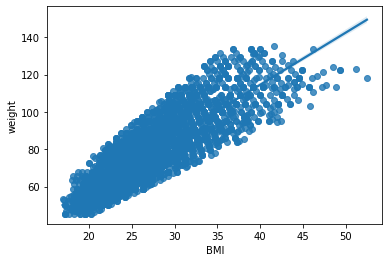

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.regplot(x='BMI',y='weight',data=data)
plt.show()

> **🙋‍♂️ Domanda 2**
>
> Cosa possiamo dire della retta visualizzata? Esistono valori per i quali l'errore commesso è maggiore? Qual è l'equazione della retta mostrata nel grafico?

### Analisi di un regressore lineare semplice

Analizziamo adesso il regrssore ottenuto e vediamo che interpretazione hanno i parametri individuati. Possiamo visualizzare un sommario sul regressore mediante il metodo `summary` dell'oggetto `ols`:

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        06:41:15   Log-Likelihood:                -10476.
No. Observations:                4231   AIC:                         2.096e+04
Df Residuals:                    4229   BIC:                         2.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3720      0.203     36.253      0.000       6.973       7.771
weight         0.2520      0.003    100.290      0.000       0.247       0.257
==============================================================================
Omnibus:                      342.463   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.107
Skew:                           0.679   Prob(JB):                    3.71e-102
Kurtosis:                       3.896   Cond. No.                         372.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Il sommario presenta molte informazioni. Alcune di esse sono autoesplicative, come ad esempio "Dep. Variable", "Model", "Method", "Date", "Time", "No. Observations", "coef". Altre sono invece molto specifiche. Tra tutti i valori mostrati, alcuni importanti sono:
 * R-squared e Adjusted R-squared;
 * F-statistic e prob(F-statistic);
 * Valori $t$ dei singoli parametri e relativi valori di $P>|t|$ (p-value);
 * I valori trovati per i singoli parametri.
Analizziamo il significato di ciascuno di questi valori:

Il valore di $R^2$ indica che la conoscenza di `weight` permette di ridurre l'errore sulle predizioni di `BMI` del $70\%$. Ciò vuol dire che, benché `weight` da sola non riesca a spiegare (linearmente) `BMI`, le due variabili sono piuttosto correlate. (Si noti che in realtà sappiamo che `BMI` si calcola a partire da `height` e `weight`, quindi questa non dovrebbe essere una scoperta sorprendente). Il valore della F-statistic è alto, mentre quello di Prob(F-statistic) è nullo. Possiamo concludere che il regressore è statisticamente significativo.

I p-value relativi a entrambi i parametri sono nulli, pertanto entrambi i parametri sono statisticamente rilevanti. Il valore dell'intercetta è pari a $7.38$. Ciò indica che a un peso di $0\ Kg$ corrisponde un BMI pari a $7.38$ secondo il modello trovato. Il valore del coefficiente di `weight` è pari a $0.25$. Ciò significa che incrementando il peso di un kilogrammo, il BMI aumenta di $0.25\ Kg/m^2$.

## Regressione Lineare Multipla

Vediamo adesso un esempio di regressione multipla. La regressione lineare multipla permette di studiare le relazioni tra una variabile dipendente e un insieme di variabili indipendenti. Calcoliamo un regressore lineare per predire i valori di `BMI` da quelli di `height` e `weight`:

In [21]:
model = ols('BMI ~ height + weight',data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.513e+05
Date:                Fri, 26 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:48:28   Log-Likelihood:                -3987.0
No. Observations:                4231   AIC:                             7980.
Df Residuals:                    4228   BIC:                             7999.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8865      0.171    327.627      0.000      55.552      56.221
height        -0.3310      0.001   -294.311      0.000      -0.333      -0.329
weight         0.3497      0.001    550.104      0.000       0.348       0.351
==============================================================================
Omnibus:                      441.026   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3489.395
Skew:                           0.132   Prob(JB):                         0.00
Kurtosis:                       7.441   Cond. No.                     3.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il regressore lineare trovato ha un valore di $R^2$ molto alto ($0.986$), una F-statistic alta e un valore di Prob(F-statistic) nullo. Possiamo concludere che il regressore è significativo. I p-value dei parametri sono tutti nulli, il che significa che le variabili contribuiscono tutte significativamente alla regressione. 

L'intercetta ha un valore pari a $55.88$, il che indica che, idealmente, un soggetto di peso e altezza nulla avrebbe un `BMI` pari a $55.88\ Kg/m^2$. Il coefficiente di `height` indica che quando l'altezza viene incrementata di un metro, il BMI viene decrementato di $0.33\ Kg/m^2$. Analogamente, quando il peso viene incrementato di un kilogrammo, il BMI viene incrementato di $0.35\ Kg/m^2$.

### Boston House Pricing Dataset

Vediamo adesso un esempio con un dataset più complesso. Utilizzeremo il dataset "Boston" che contiene osservazioni relativi ai prezzi di diverse case nei sobborghi di Boston. Carichiamo il dataset mediante la funzione `get_rdataset` di `statsmodels`, che permette di caricare dataset contenuti nelle librerie del linguaggio R:

In [10]:
from statsmodels.datasets import get_rdataset
boston = get_rdataset('Boston', package='MASS')

I dataset caricati mediante `get_rdataset` presentano la medesima struttura. Esiste una documentazione nella proprietà `__doc__`. Stampiamola per farci un'idea più precisa sul dataset:

In [11]:
print(boston.__doc__)

.. container::

   ====== ===============
   Boston R Documentation
   ====== ===============

   .. rubric:: Housing Values in Suburbs of Boston
      :name: Boston

   .. rubric:: Description
      :name: description

   The ``Boston`` data frame has 506 rows and 14 columns.

   .. rubric:: Usage
      :name: usage

   .. code:: R

      Boston

   .. rubric:: Format
      :name: format

   This data frame contains the following columns:

   ``crim``
      per capita crime rate by town.

   ``zn``
      proportion of residential land zoned for lots over 25,000 sq.ft.

   ``indus``
      proportion of non-retail business acres per town.

   ``chas``
      Charles River dummy variable (= 1 if tract bounds river; 0
      otherwise).

   ``nox``
      nitrogen oxides concentration (parts per 10 million).

   ``rm``
      average number of rooms per dwelling.

   ``age``
      proportion of owner-occupied units built prior to 1940.

   ``dis``
      weighted mean of distances to five Bost

Il dataframe contenente le osservazioni si trova all'interno della proprietà `data`:

In [12]:
boston.data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Questo dataset è generalmente utilizzato come un dataset di regressione, nel quale l'obiettivo è quello di predire il valore di `medv` (prezzo medio delle case in migliaia di dollari) a partire dai valori delle altre variabili.

### Regressori lineari, variabili categoriche e variabili dummy
Notiamo che le variabili `rad` e `chas` sono categoriche. Quando si lavora con regressori lineari e variabili categoriche bisogna fare attenzione: 
 * Le variabili categoriche non vanno utilizzate come variabili dipendenti di un regressore lineare; 
 * Le variabili categoriche possono essere utilizzate invece come variabili indipendenti solo se binarie. 
`chas` è binaria, quindi possiamo includerla tra le variabili indipendenti. `rad` invece non è binaria, pertanto non può essere inclusa tra le variabili per la regressione. 

Se vogliamo includere `rad` tra le variabili per la regressione lineare, dobbiamo trasformarla in un insiem di variabili binarie "dummy". Ogni variabile "dummy" indicherà per ogni osservazione, se essa appartiene a una specifica classe tra quelle della variabile categorica considerata.

Vediamo un esempio:

In [13]:
var = pd.Series(['A','A','B','A','C','C','B','A','C','B'])
var

0    A
1    A
2    B
3    A
4    C
5    C
6    B
7    A
8    C
9    B
dtype: object

Si consideri `var` come una variabile categorica che consta di $10$ osservazioni e $3$ classi. Possiamo sostituire la variabile `var` con tre variabili `A`,`B`,`C` tali che `A` sarà pari a $1$ solo quando `var` è uguale ad `A`, `C` sarà pari a $1$ solo quando `var` è uguale ad `C`. Possiamo ottenere queste tre variabili dummy mediante la funzione `get_dummies` di Pandas:

In [14]:
pd.get_dummies(var)

,A,B,C
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,0,1
6,0,1,0
7,1,0,0
8,0,0,1
9,0,1,0


Confrontiamo ad esempio l'osservazione di indice $5$ della serie e del DataFrame di variabili dummy:

In [15]:
print(var[5],'\n')
print(pd.get_dummies(var).loc[5])

C 

A    0
B    0
C    1
Name: 5, dtype: uint8


Il valore di `var` è $5$. In maniera corrispondente, la variabile dummy `C` è pari a $1$, mentre le altre sono pari a zero. Questo tipo di rappresentazione di `var` è tuttavia ridondante. Infatti, se sappiamo che $B=0$ e $C=0$, possiamo facilmente dedurre che $A=1$. Questa semplice ridondanza può creare problemi di clacolo numerico nell'ottimizzazione del regressore lineare. Per evitarla, generalmente si esclude una delle variabili dummy. Possiamo ottenere questo risultato come segue:

In [16]:
pd.get_dummies(var,drop_first=True)

,B,C
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
5,0,1
6,1,0
7,0,0
8,0,1
9,1,0


Possiamo convertire la variabile categorica `rad` in un insieme di variabili dummy come segue:

In [17]:
boston_mod=pd.get_dummies(boston.data, columns=['rad'],drop_first=True)
boston_mod.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,lstat,medv,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,4.98,24.0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,9.14,21.6,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,4.03,34.7,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,2.94,33.4,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,5.33,36.2,0,1,0,0,0,0,0,0


Ispezioniamo i nomi delle colonne:

In [18]:
boston_mod.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'black', 'lstat', 'medv', 'rad_2', 'rad_3', 'rad_4', 'rad_5',
       'rad_6', 'rad_7', 'rad_8', 'rad_24'],
      dtype='object')

Notiamo che `rad` è stata rimossa e sostituita da diverse variabili dummy, rappresentanti i vari valori assunti da `rad`. Possiamo adesso procedere al calcolo del regressore lineare multiplo:

In [19]:
model=ols("""medv ~ crim + zn + indus + chas + nox + rm +age + dis + tax + 
          ptratio + black + lstat + rad_2 + rad_3 + rad_4 + rad_5 + rad_6 + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     72.70
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          8.29e-132
Time:                        06:43:47   Log-Likelihood:                -1489.6
No. Observations:                 506   AIC:                             3021.
Df Residuals:                     485   BIC:                             3110.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2596      5.434      6.489      0.000      24.583      45.936
crim          -0.1088      0.033     -3.329      0.001      -0.173      -0.045
zn             0.0549      0.014      3.880      0.000       0.027       0.083
indus          0.0238      0.064      0.373      0.709      -0.101       0.149
chas           2.5242      0.863      2.924      0.004       0.828       4.220
nox          -17.5731      3.896     -4.510      0.000     -25.229      -9.917
rm             3.6655      0.421      8.703      0.000       2.838       4.493
age            0.0005      0.013      0.035      0.972      -0.026       0.026
dis           -1.5545      0.202     -7.699      0.000      -1.951      -1.158
tax           -0.0087      0.004     -2.246      0.025      -0.016      -0.001
ptratio       -0.9724      0.144     -6.731      0.000      -1.256      -0.689
black          0.0094      0.003      3.531      0.000       0.004       0.015
lstat         -0.5292      0.051    -10.451      0.000      -0.629      -0.430
rad_2          1.4889      1.478      1.008      0.314      -1.414       4.392
rad_3          4.6813      1.335      3.506      0.000       2.058       7.305
rad_4          2.5762      1.187      2.170      0.031       0.243       4.909
rad_5          2.9185      1.208      2.417      0.016       0.546       5.291
rad_6          1.1858      1.464      0.810      0.418      -1.691       4.062
rad_7          4.8790      1.571      3.105      0.002       1.792       7.966
rad_8          4.8398      1.492      3.245      0.001       1.909       7.771
rad_24         7.4617      1.789      4.172      0.000       3.947      10.976
==============================================================================
Omnibus:                      183.890   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.805
Skew:                           1.554   Prob(JB):                    3.26e-187
Kurtosis:                       8.575   Cond. No.                     1.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il regressore ottenuto presenta un valore di $R^2$ piuttosto alto. Ciò vuol dire che, globalmente, le variabili indipendenti sono correlate con la variabile dipendente. La F-statistic è alta e il p-value corrispondente è molto basso. Il regressore è, globalmente, statisticamente significativo. 

Passiamo all'analisi dei p-value dei singoli parametri trovati. I p-value delle seguenti variabili sono più alti di $0.05$:
 * `indus`;
 * `age`;
 * `rad2`;
 * `rad6`.
 
Queste variabili non contribuiscono significativamente alla regressione. Analizziamo i valori dei parametri relativi a varabili che contribuiscono statisticamente alla regressione:
 * `intercept`: quando tutte le altre variabili assumono valori nulli, `medv` assume il valore $35.26$. Ricordiamo che `medv` esprime il prezzo medio delle case in migliaia di dollari, per cui il "prezzo medio base" delle case è di circa $35260$ dollari;
 * `crim`: l'incremento di una unità del tasso di criminalità pro-capite abbassa il valore delle case di cica $108$ dollari;
 * `zn`: l'incremento di una unità della proporzione di terre destinate a uso residenziale aumenta il valore delle case di circa $54$ dollari;
 * `chas`: quando la variabile è pari a $1$ (ricordiamo che si tratta di una variabile categorica), il prezzo delle case sale di circa $2500$ dollari. Possiamo dire che le case vicine al fiume tendono ad essere più care;
 * `nox`: l'aumento di una unità della concentrazione di ossido di azoto abbassa i prezzi delle case di circa $17500$ dollari. Questo può sembrare un numero altissimo, ma si noti che i valori di `nox` variano tra un minimo di $0.38$ a un massimo di $0.87$, per cui non si verificheranno decrementi dei prezzi delle case così grandi;
 * `rm`: l'incremento del numero di stanze di una unità incrementa il prezzo della casa di circa $3600$ dollari;
 * `dis`: l'incremento di una unità della distanza media dal centro diminuisce il prezzo delle case di circa $1500$ dollari (le case più distanti dal centro valgono di meno);
 * `tax`: l'aumento di un unità del tax-rate della proprietà ne diminuisce il valore di 8 dollari. Sembra un decremento trascurabile, tuttavia, si consideri che il range di `tax` è compreso tra $187$ e $711$;
 * `ptratio`: l'aumento di una unità del rapporto insegnante-alunni diminuisce il valore della proprietà di circa $1000$ dollari;
 * `black`: l'aumento di una unità del valore di `black` (una variabile dipendente dalla proporzione tra abitanti bianchi e neri) incrementa il valore delle case di pochi dollari. Si consideri che il range di `black` va da circa $0$ a $396$;
 * `lstat`: l'aumento di una unità del valore di questa variabile (percenutale di abitanti meno abbienti) diminuisce il prezzo delle case di circa $500$ dollari;
 * I coefficienti appresi per le variabili dummy di `rad` indicano che quando `rad` assume il valore 24, il valore delle case aumenta di circa $7500$ dollari. Altri valori di `rad` contribuiscono differentemente all'incremento del valore di `medv`;

> **🙋‍♂️ Domanda 3**
>
> Dati i risultati del regressore lineare, qual è la variabile più influente nella regressione?

In [27]:
model=ols("""medv ~ crim + zn + indus + chas + nox + rm +age + dis + tax + 
          ptratio + black + lstat + rad""", boston.data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          6.72e-135
Time:                        06:48:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
rad            0.3060      0.066      4.613      0.000       0.176       0.436
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It should be noted that, when it is obvious that a variable is categorical, `statsmodels` automatically create dummy variables internally. For instance, let us modify the dataframe so that `rad` becomes text:

In [35]:
boston2 = boston.data.copy()
boston2['rad'] = boston2['rad'].apply(str)
boston2['rad']

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: rad, Length: 506, dtype: object

If we fit a linear regressor model on the modified dataset, `statsmodels` will introduce different dummy variables for the different values of `rad`:

In [36]:
model=ols("""medv ~ crim + zn + indus + chas + nox + rm +age + dis + tax + 
          ptratio + black + lstat + rad""", boston2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     72.70
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          8.29e-132
Time:                        06:57:15   Log-Likelihood:                -1489.6
No. Observations:                 506   AIC:                             3021.
Df Residuals:                     485   BIC:                             3110.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2596      5.434      6.489      0.000      24.583      45.936
rad[T.2]       1.4889      1.478      1.008      0.314      -1.414       4.392
rad[T.24]      7.4617      1.789      4.172      0.000       3.947      10.976
rad[T.3]       4.6813      1.335      3.506      0.000       2.058       7.305
rad[T.4]       2.5762      1.187      2.170      0.031       0.243       4.909
rad[T.5]       2.9185      1.208      2.417      0.016       0.546       5.291
rad[T.6]       1.1858      1.464      0.810      0.418      -1.691       4.062
rad[T.7]       4.8790      1.571      3.105      0.002       1.792       7.966
rad[T.8]       4.8398      1.492      3.245      0.001       1.909       7.771
crim          -0.1088      0.033     -3.329      0.001      -0.173      -0.045
zn             0.0549      0.014      3.880      0.000       0.027       0.083
indus          0.0238      0.064      0.373      0.709      -0.101       0.149
chas           2.5242      0.863      2.924      0.004       0.828       4.220
nox          -17.5731      3.896     -4.510      0.000     -25.229      -9.917
rm             3.6655      0.421      8.703      0.000       2.838       4.493
age            0.0005      0.013      0.035      0.972      -0.026       0.026
dis           -1.5545      0.202     -7.699      0.000      -1.951      -1.158
tax           -0.0087      0.004     -2.246      0.025      -0.016      -0.001
ptratio       -0.9724      0.144     -6.731      0.000      -1.256      -0.689
black          0.0094      0.003      3.531      0.000       0.004       0.015
lstat         -0.5292      0.051    -10.451      0.000      -0.629      -0.430
==============================================================================
Omnibus:                      183.890   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.805
Skew:                           1.554   Prob(JB):                    3.26e-187
Kurtosis:                       8.575   Cond. No.                     1.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Alternatively, we can instruct statsmodels to use a variable as a categorical one with the `C(variable)` tag:

In [45]:
model=ols("""medv ~ crim + zn + indus + chas + nox + rm +age + dis + tax + 
          ptratio + black + lstat + C(rad)""", boston.data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     72.70
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          8.29e-132
Time:                        07:05:32   Log-Likelihood:                -1489.6
No. Observations:                 506   AIC:                             3021.
Df Residuals:                     485   BIC:                             3110.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.2596      5.434      6.489      0.000      24.583      45.936
C(rad)[T.2]      1.4889      1.478      1.008      0.314      -1.414       4.392
C(rad)[T.3]      4.6813      1.335      3.506      0.000       2.058       7.305
C(rad)[T.4]      2.5762      1.187      2.170      0.031       0.243       4.909
C(rad)[T.5]      2.9185      1.208      2.417      0.016       0.546       5.291
C(rad)[T.6]      1.1858      1.464      0.810      0.418      -1.691       4.062
C(rad)[T.7]      4.8790      1.571      3.105      0.002       1.792       7.966
C(rad)[T.8]      4.8398      1.492      3.245      0.001       1.909       7.771
C(rad)[T.24]     7.4617      1.789      4.172      0.000       3.947      10.976
crim            -0.1088      0.033     -3.329      0.001      -0.173      -0.045
zn               0.0549      0.014      3.880      0.000       0.027       0.083
indus            0.0238      0.064      0.373      0.709      -0.101       0.149
chas             2.5242      0.863      2.924      0.004       0.828       4.220
nox            -17.5731      3.896     -4.510      0.000     -25.229      -9.917
rm               3.6655      0.421      8.703      0.000       2.838       4.493
age              0.0005      0.013      0.035      0.972      -0.026       0.026
dis             -1.5545      0.202     -7.699      0.000      -1.951      -1.158
tax             -0.0087      0.004     -2.246      0.025      -0.016      -0.001
ptratio         -0.9724      0.144     -6.731      0.000      -1.256      -0.689
black            0.0094      0.003      3.531      0.000       0.004       0.015
lstat           -0.5292      0.051    -10.451      0.000      -0.629      -0.430
==============================================================================
Omnibus:                      183.890   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.805
Skew:                           1.554   Prob(JB):                    3.26e-187
Kurtosis:                       8.575   Cond. No.                     1.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
ols("weight ~ BMI + height + sex",data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.392e+05
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        06:54:01   Log-Likelihood:                -8403.1
No. Observations:                4231   AIC:                         1.681e+04
Df Residuals:                    4227   BIC:                         1.684e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -158.3473      0.670   -236.287      0.000    -159.661    -157.033
sex[T.M]       0.0592      0.079      0.753      0.451      -0.095       0.213
BMI            2.8199      0.005    546.155      0.000       2.810       2.830
height         0.9440      0.004    240.347      0.000       0.936       0.952
==============================================================================
Omnibus:                      412.503   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2913.710
Skew:                           0.146   Prob(JB):                         0.00
Kurtosis:                       7.055   Cond. No.                     4.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

However, there is less control on which dummy variables to include or not in the model, as seen in the next section.

### Backward Elimination
Il modello di regressione lineare calcolato è in generale buono, ma include alcune variabili che non contribuiscono significativamente alla regressione. In pratica, queste variabili possono inficiare il calcolo del regressore lineare e quindi sarebbe ideale non averle dentro. Potremmo rimuoverle tutte, ma non siamo sicuri che, in assenza di alcune, le altre non acquisiscano una qualche significatività. Esistono diverse tecniche per eliminare tali variabili. Una delle possibilità consiste nell'usare il metodo della **backward elimination**, che è definito come segue:
 
 1. Si calcola il regressore lineare considerando tutte le variabili dipendenti;
 * Se tutte le variabili sono significative, il regressore trovato è quello finale;
 * Se qualche variabile non è significativa, si rimuove la variabile con p-value più alto, si ricalcola il regressore lineare e si va al punto 2.
 
Alla fine del processo, otterremo un regressore in cui tutte le variabili sono significative. 

Applichiamo il processo al nostro esempio. La variabile con p-value più alto è `age`. Riomuoviamola e ricalcoliamo il regressore:

In [20]:
model=ols("""medv ~ crim + zn + indus + chas + nox + rm + dis + tax + 
          ptratio + black + lstat + rad_2 + rad_3 + rad_4 + rad_5 + rad_6 + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     76.68
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          9.34e-133
Time:                        06:44:13   Log-Likelihood:                -1489.6
No. Observations:                 506   AIC:                             3019.
Df Residuals:                     486   BIC:                             3104.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2429      5.407      6.518      0.000      24.619      45.867
crim          -0.1088      0.033     -3.333      0.001      -0.173      -0.045
zn             0.0548      0.014      3.900      0.000       0.027       0.082
indus          0.0238      0.064      0.374      0.709      -0.101       0.149
chas           2.5256      0.861      2.932      0.004       0.833       4.218
nox          -17.5386      3.765     -4.659      0.000     -24.936     -10.142
rm             3.6682      0.414      8.869      0.000       2.856       4.481
dis           -1.5566      0.193     -8.058      0.000      -1.936      -1.177
tax           -0.0087      0.004     -2.250      0.025      -0.016      -0.001
ptratio       -0.9719      0.144     -6.769      0.000      -1.254      -0.690
black          0.0094      0.003      3.544      0.000       0.004       0.015
lstat         -0.5286      0.047    -11.130      0.000      -0.622      -0.435
rad_2          1.4910      1.475      1.011      0.313      -1.407       4.389
rad_3          4.6798      1.333      3.510      0.000       2.060       7.300
rad_4          2.5748      1.185      2.172      0.030       0.246       4.904
rad_5          2.9185      1.206      2.419      0.016       0.548       5.289
rad_6          1.1833      1.461      0.810      0.418      -1.687       4.053
rad_7          4.8767      1.568      3.110      0.002       1.795       7.958
rad_8          4.8423      1.488      3.253      0.001       1.918       7.767
rad_24         7.4563      1.780      4.188      0.000       3.958      10.954
==============================================================================
Omnibus:                      184.084   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.138
Skew:                           1.555   Prob(JB):                    1.01e-187
Kurtosis:                       8.583   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notiamo che il valore di $R^2$ è rimasto invariato. Esistono ancora variabili non statisticamente rilevanti. Rimuoviamo `indus`, che ha il p-value più alto:

In [21]:
model=ols("""medv ~ crim + zn + chas + nox + rm + dis + tax + 
          ptratio + black + lstat + rad_2 + rad_3 + rad_4 + rad_5 + rad_6 + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     81.08
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.10e-133
Time:                        06:44:17   Log-Likelihood:                -1489.7
No. Observations:                 506   AIC:                             3017.
Df Residuals:                     487   BIC:                             3098.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.1757      5.399      6.515      0.000      24.567      45.784
crim          -0.1094      0.033     -3.355      0.001      -0.173      -0.045
zn             0.0541      0.014      3.891      0.000       0.027       0.081
chas           2.5593      0.856      2.990      0.003       0.878       4.241
nox          -17.1366      3.605     -4.754      0.000     -24.219     -10.054
rm             3.6519      0.411      8.887      0.000       2.845       4.459
dis           -1.5711      0.189     -8.312      0.000      -1.943      -1.200
tax           -0.0081      0.004     -2.312      0.021      -0.015      -0.001
ptratio       -0.9691      0.143     -6.765      0.000      -1.251      -0.688
black          0.0094      0.003      3.537      0.000       0.004       0.015
lstat         -0.5275      0.047    -11.138      0.000      -0.621      -0.434
rad_2          1.5671      1.459      1.074      0.283      -1.300       4.435
rad_3          4.6605      1.331      3.501      0.001       2.045       7.276
rad_4          2.6052      1.182      2.205      0.028       0.284       4.927
rad_5          2.9000      1.204      2.408      0.016       0.534       5.266
rad_6          1.1244      1.451      0.775      0.439      -1.726       3.975
rad_7          4.8734      1.567      3.110      0.002       1.795       7.952
rad_8          4.7944      1.482      3.236      0.001       1.883       7.706
rad_24         7.3362      1.749      4.194      0.000       3.899      10.774
==============================================================================
Omnibus:                      184.119   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.392
Skew:                           1.555   Prob(JB):                    8.93e-188
Kurtosis:                       8.584   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notiamo che l'adjusted $R^2$ è leggermente salito. Ciò indica che il regressore trovato è leggermente migliore degli altri. Esistono ancora variabili non rilvanti statisticamente. Rimuoviamo `rad6` che ha il p-value più alto:

In [22]:
model=ols("""medv ~ crim + zn + chas + nox + rm + dis + tax + 
          ptratio + black + lstat + rad_2 + rad_3 + rad_4 + rad_5 + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     85.88
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.56e-134
Time:                        06:44:22   Log-Likelihood:                -1490.0
No. Observations:                 506   AIC:                             3016.
Df Residuals:                     488   BIC:                             3092.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0716      5.272      6.842      0.000      25.713      46.430
crim          -0.1099      0.033     -3.375      0.001      -0.174      -0.046
zn             0.0529      0.014      3.830      0.000       0.026       0.080
chas           2.5397      0.855      2.970      0.003       0.860       4.220
nox          -17.4021      3.587     -4.852      0.000     -24.449     -10.355
rm             3.6414      0.411      8.870      0.000       2.835       4.448
dis           -1.5824      0.188     -8.400      0.000      -1.953      -1.212
tax           -0.0077      0.003     -2.216      0.027      -0.014      -0.001
ptratio       -0.9780      0.143     -6.851      0.000      -1.258      -0.698
black          0.0094      0.003      3.554      0.000       0.004       0.015
lstat         -0.5262      0.047    -11.123      0.000      -0.619      -0.433
rad_2          0.9497      1.222      0.777      0.438      -1.452       3.351
rad_3          4.0559      1.078      3.762      0.000       1.938       6.174
rad_4          1.9660      0.846      2.324      0.021       0.304       3.628
rad_5          2.2505      0.865      2.603      0.010       0.552       3.949
rad_7          4.2718      1.360      3.140      0.002       1.599       6.945
rad_8          4.1634      1.237      3.365      0.001       1.732       6.595
rad_24         6.5600      1.434      4.575      0.000       3.743       9.377
==============================================================================
Omnibus:                      183.149   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              853.017
Skew:                           1.548   Prob(JB):                    5.89e-186
Kurtosis:                       8.557   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Proseguiamo rimuovendo `rad2`:

In [23]:
model=ols("""medv ~ crim + zn + chas + nox + rm + dis + tax + 
          ptratio + black + lstat  + rad_3 + rad_4 + rad_5  + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     91.29
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.17e-135
Time:                        06:44:23   Log-Likelihood:                -1490.3
No. Observations:                 506   AIC:                             3015.
Df Residuals:                     489   BIC:                             3087.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5878      5.228      6.999      0.000      26.316      46.859
crim          -0.1104      0.033     -3.393      0.001      -0.174      -0.046
zn             0.0528      0.014      3.829      0.000       0.026       0.080
chas           2.5090      0.854      2.938      0.003       0.831       4.187
nox          -17.5190      3.582     -4.891      0.000     -24.557     -10.481
rm             3.6650      0.409      8.956      0.000       2.861       4.469
dis           -1.5974      0.187     -8.527      0.000      -1.965      -1.229
tax           -0.0082      0.003     -2.430      0.015      -0.015      -0.002
ptratio       -0.9814      0.143     -6.881      0.000      -1.262      -0.701
black          0.0094      0.003      3.551      0.000       0.004       0.015
lstat         -0.5240      0.047    -11.100      0.000      -0.617      -0.431
rad_3          3.7017      0.977      3.790      0.000       1.783       5.621
rad_4          1.6623      0.750      2.217      0.027       0.189       3.135
rad_5          1.9304      0.760      2.541      0.011       0.438       3.423
rad_7          3.9667      1.302      3.047      0.002       1.408       6.525
rad_8          3.8288      1.160      3.302      0.001       1.550       6.107
rad_24         6.4209      1.422      4.515      0.000       3.627       9.215
==============================================================================
Omnibus:                      182.880   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.759
Skew:                           1.545   Prob(JB):                    6.69e-186
Kurtosis:                       8.559   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Non ci sono più variabili non significative. Il regressore trovato è quello finale. Va notato che i coefficienti delle variabili sono leggermente cambiati rispetto al regressore che conteneva tutte le variabili.

> **🙋‍♂️ Domanda 4**
>
> Si calcolino i valori MSE per il primo regressore trovato (quello contenente tutte le variabili) e l'ultimo (quello contenente solo variabili significative). Esistono differenze tra i due valori?

## Residual Plots

Possiamo visualizzare i residual plots e i Q-Q plot dei residui di un regressore lineare mediante `statsmodels`:

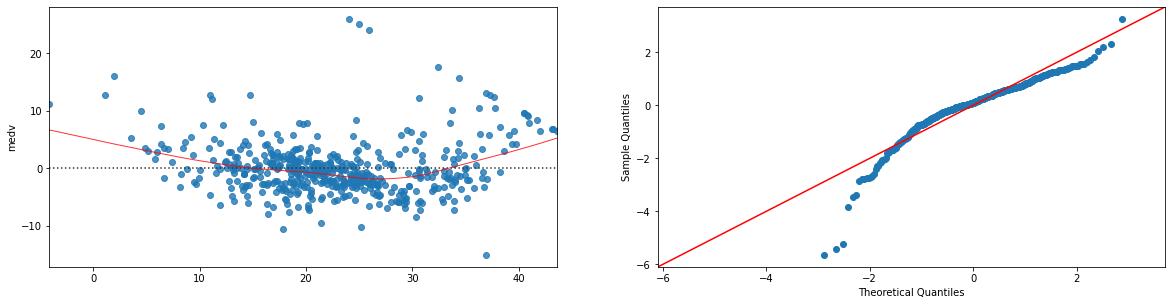

In [52]:
import statsmodels.api as sm
model=ols("""medv ~ crim + zn + chas + nox + rm + dis + tax + 
          ptratio + black + lstat  + rad_3 + rad_4 + rad_5  + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()

#otteniamo i valori predetti dal modello:
fitted = model.fittedvalues.fillna(0) #rimpiazzo eventuali NaN con zero

plt.figure(figsize=(20,22))
sns.residplot(x=fitted, y='medv', data=boston_mod.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
sm.qqplot(fitted-boston_mod.dropna()['medv'], line='45',fit=True, ax=plt.subplot(422))
plt.show()

## Estensioni al Modello Lineare
La API `formula` di `statsmodels` rende semplice inserire deviazioni dal modello lineare. Vediamo degli esempi con il dataset **Auto MPG**. Carichiamo il dataset:

In [46]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
data = X.join(y)
data

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


Calcoliamo un semplice regressore lineare:

In [47]:
ols("mpg ~ horsepower + weight", data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          3.06e-104
Time:                        07:08:31   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il regressore è statisticamente lineare e ha un $R^2=0.706$. Visualizziamo residual e Q-Q plot:

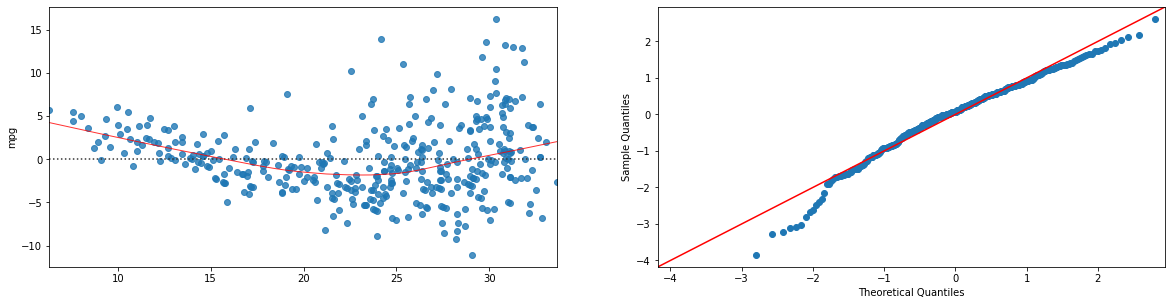

In [56]:
import statsmodels.api as sm
model=ols("mpg ~ horsepower + weight", data).fit()

#otteniamo i valori predetti dal modello:
fitted = model.fittedvalues.fillna(0) #rimpiazzo eventuali NaN con zero

plt.figure(figsize=(20,22))
sns.residplot(x=fitted, y='mpg', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
sm.qqplot(fitted-data.dropna()['mpg'], line='45',fit=True, ax=plt.subplot(422))
plt.show()

### Interaction terms

Aggiungiamo un termine di interazione tra "weight" e "horsepower":

In [53]:
ols("mpg ~ horsepower + weight + weight*horsepower", data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          7.26e-116
Time:                        07:17:40   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            63.5579      2.343     27.127      0.000      58.951      68.164
horsepower           -0.2508      0.027     -9.195      0.000      -0.304      -0.197
weight               -0.0108      0.001    -13.921      0.000      -0.012      -0.009
weight:horsepower  5.355e-05   6.65e-06      8.054      0.000    4.05e-05    6.66e-05
==============================================================================
Omnibus:                       34.175   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.522
Skew:                           0.577   Prob(JB):                     1.45e-12
Kurtosis:                       4.417   Cond. No.                     4.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il valore di $R^2$ si è alzato di un po' ed è ora $0.748$. La relazione introdotto è statisticamente rilevante. Visualizziamo i residual plot:

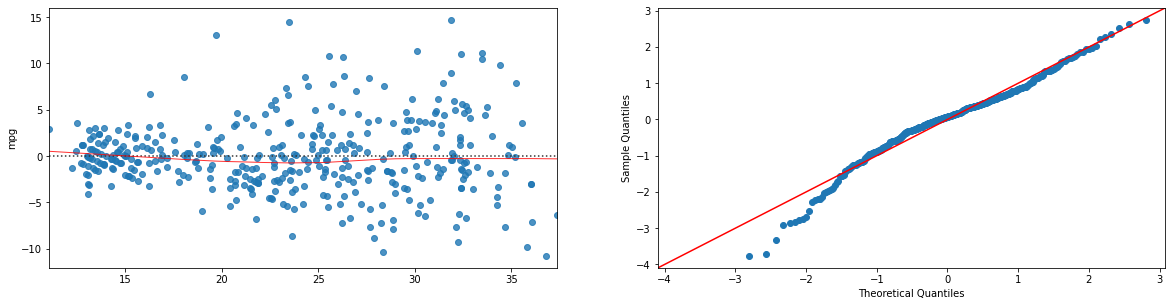

In [58]:
import statsmodels.api as sm
model=ols("mpg ~ horsepower + weight + horsepower*weight", data).fit()

#otteniamo i valori predetti dal modello:
fitted = model.fittedvalues.fillna(0) #rimpiazzo eventuali NaN con zero

plt.figure(figsize=(20,22))
sns.residplot(x=fitted, y='mpg', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
sm.qqplot(fitted-data.dropna()['mpg'], line='45',fit=True, ax=plt.subplot(422))
plt.show()

I residui sono meno correlati con la variabile predetta e il Q-Q plot mostra una deviazione minore dalla Gaussiana. Il modello "spiega" meglio i dati. 

### Modello Quadratico
Proviamo a fare fit di un modello quadratico:

In [85]:
ols("mpg ~ horsepower + I(horsepower**2)", data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.40e-99
Time:                        07:25:55   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
I(horsepower ** 2)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Da notare che è necessario specificare `I(horsepower**2)` per aggiungere il termine quadratico (semplicemente `horsepower**2` verrebbe ignorato). Il modello ha un $R^2$ inferiore al modello con termine di interazione, ma comunque superiore al modello base:

In [86]:
ols("mpg ~ horsepower", data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           7.03e-81
Time:                        07:27:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vediamo i residual plot:

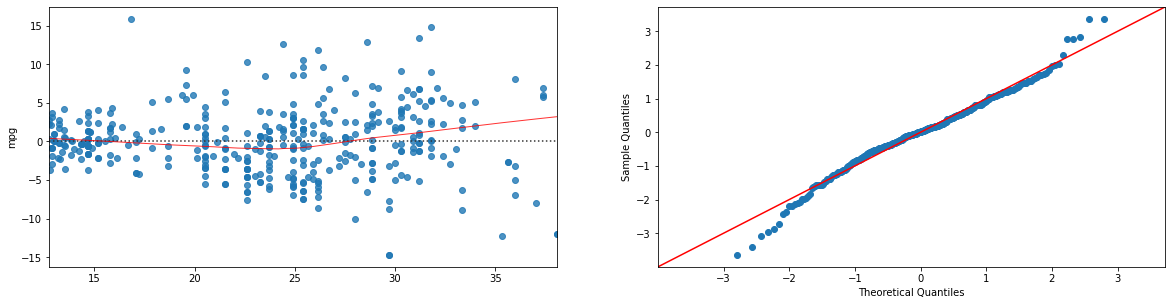

In [87]:
import statsmodels.api as sm
import numpy as np
model=ols("mpg ~ horsepower + I(horsepower**2)", data).fit()

#otteniamo i valori predetti dal modello:
fitted = model.fittedvalues.fillna(0) #rimpiazzo eventuali NaN con zero

plt.figure(figsize=(20,22))
sns.residplot(x=fitted, y='mpg', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
sm.qqplot(fitted-data.dropna()['mpg'], line='45',fit=True, ax=plt.subplot(422))
plt.show()

Anche in questo caso, i residual plot sono "migliori" di quelli del modello base:

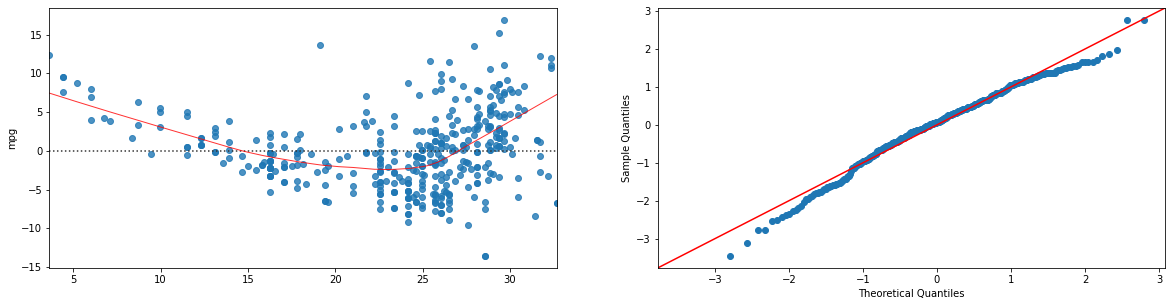

In [88]:
import statsmodels.api as sm
import numpy as np
model=ols("mpg ~ horsepower", data).fit()

#otteniamo i valori predetti dal modello:
fitted = model.fittedvalues.fillna(0) #rimpiazzo eventuali NaN con zero

plt.figure(figsize=(20,22))
sns.residplot(x=fitted, y='mpg', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
sm.qqplot(fitted-data.dropna()['mpg'], line='45',fit=True, ax=plt.subplot(422))
plt.show()

### Regressione Polinomiale
Sembra comunque che il modello con termini di interazione sia migliore di quello quadratico. Potremmo pensare di unire le due cose facendo fit di un regressore polinomiale:

$$mpg = \beta_0 + \beta_1 horsepower^2 + \beta_2 weight^2 + \beta_3 horsepower\cdot weight + \beta_4 horsepower + \beta_5 weight$$

Ciò si fa facilmente in statsmodels come segue:

In [89]:
ols("mpg ~ I(horsepower**2) + I(weight**2) + horsepower*weight + horsepower + weight", data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     230.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.30e-113
Time:                        07:31:26   Log-Likelihood:                -1089.9
No. Observations:                 392   AIC:                             2192.
Df Residuals:                     386   BIC:                             2216.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             63.4053      2.939     21.572      0.000      57.626      69.184
I(horsepower ** 2)     0.0003      0.000      1.138      0.256      -0.000       0.001
I(weight ** 2)      2.438e-07   7.94e-07      0.307      0.759   -1.32e-06     1.8e-06
horsepower            -0.2646      0.052     -5.093      0.000      -0.367      -0.162
weight                -0.0102      0.003     -3.558      0.000      -0.016      -0.005
horsepower:weight   3.594e-05   2.53e-05      1.421      0.156   -1.38e-05    8.57e-05
==============================================================================
Omnibus:                       31.272   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.516
Skew:                           0.531   Prob(JB):                     1.07e-11
Kurtosis:                       4.402   Cond. No.                     1.63e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notiamo che i p-value dei termini quadratici e dell'interaction term sono alti. Applichiamo backward elimination e iniziamo rimuovendo il termine $horsepower^2$:

In [90]:
ols("mpg ~ I(weight**2) + horsepower*weight + horsepower + weight", data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     288.1
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.37e-114
Time:                        07:32:20   Log-Likelihood:                -1090.6
No. Observations:                 392   AIC:                             2191.
Df Residuals:                     387   BIC:                             2211.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            62.7418      2.882     21.771      0.000      57.076      68.408
I(weight ** 2)    -3.068e-07    6.3e-07     -0.487      0.626   -1.54e-06    9.31e-07
horsepower           -0.2721      0.052     -5.281      0.000      -0.373      -0.171
weight               -0.0095      0.003     -3.388      0.001      -0.015      -0.004
horsepower:weight  5.971e-05   1.43e-05      4.183      0.000    3.16e-05    8.78e-05
==============================================================================
Omnibus:                       32.870   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.237
Skew:                           0.560   Prob(JB):                     4.54e-12
Kurtosis:                       4.395   Cond. No.                     1.60e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rimuoviamo ora $weight^2$:

In [91]:
ols("mpg ~  horsepower*weight + horsepower + weight", data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          7.26e-116
Time:                        07:32:46   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            63.5579      2.343     27.127      0.000      58.951      68.164
horsepower           -0.2508      0.027     -9.195      0.000      -0.304      -0.197
weight               -0.0108      0.001    -13.921      0.000      -0.012      -0.009
horsepower:weight  5.355e-05   6.65e-06      8.054      0.000    4.05e-05    6.66e-05
==============================================================================
Omnibus:                       34.175   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.522
Skew:                           0.577   Prob(JB):                     1.45e-12
Kurtosis:                       4.417   Cond. No.                     4.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ci siamo ricondotti al modello con interaction term. Da qui deduciamo che un modello polinomiale non modella i dati meglio del modello con termini di interazione.

## Esercizi
> 🧑‍💻 Esercizio 1
> 
> Si consideri il dataset delle iris di Fisher. Si effettui uno scatterplot per studiare le relazioni tra le variabili. Si calcoli la matrice di correlazione usando gli indici di correlazione di Pearson, Spearman e Kendall. Esistono correlazioni deboli, medie o forti? Si calcoli l'indice di correlazione di Pearson tra le due coppie di variabili che individuano le correlazioni più forti. Si tratta di correlazioni significative?

> 🧑‍💻 Esercizio 2
> 
> Si effettui la normalizzazione **z-scoring** su tutte le variabili del dataset delle iris di Fisher. Si calcoli la matrice di covarianza delle variabili normalizzate. Si confronti la matrice ottenuta con la matrice di correlazione calcolata mediante l'indice di Pearson. Ci sono differenze tra le due matrici? Perché?

> 🧑‍💻 Esercizio 3
> 
> Si consideri il dataset Titanic. Si calcoli un regressore lineare che predica i valori di `Fare` dai valori di `Survived`, `Pclass`, `Sex` e `Age`. Si inseriscano variabili dummy ove opportuno. Il regressore ottenuto è un buon regressore? Quali variabili contribuiscono significativamente alla regressione? Esistono variabili non rilevanti? Si eliminino tali variabili mediante la tecnica della backward elimination. Si discuta il significato dei coefficienti individuati.

> 🧑‍💻 Esercizio 4
> 
> Si consideri il dataset Titanic. Si calcoli un regressore lineare che predica i valori di `Age` dai valori di `Survived`, `Pclass`, `Sex` e `Fare`. Si inseriscano variabili dummy ove opportuno. Il regressore ottenuto è un buon regressore? Si tratta di un regressore migliore o peggiore del regressore calcolato nell'esercizio precedente? Quali variabili contribuiscono significativamente alla regressione? Esistono variabili non rilevanti? Si eliminino tali variabili mediante la tecnica della backward elimination. Si discuta il significato dei coefficienti individuati.

> 🧑‍💻 Esercizio 5
> 
> Si consideri il dataset Boston. Si calcoli un regressore lineare che predica i valori di `crim` dai valori delle altre variabili. Si inseriscano variabili dummy ove opportuno. Quali variabili contribuiscono significativamente alla regressione? Esistono variabili non rilevanti? Si eliminino tali variabili mediante la tecnica della backward elimination. Si discuta il significato dei coefficienti individuati.